In [1]:
!pip install torch
!pip install nilearn
!pip install nibabel
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install torch torchvision

!git clone https://gitlab.inria.fr/epione_ML/mcvae.git


fatal: destination path 'mcvae' already exists and is not an empty directory.


In [2]:
%cd mcvae 
!python ./setup.py install


/content/mcvae
running install
running bdist_egg
running egg_info
writing src/mcvae.egg-info/PKG-INFO
writing dependency_links to src/mcvae.egg-info/dependency_links.txt
writing top-level names to src/mcvae.egg-info/top_level.txt
writing manifest file 'src/mcvae.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/plot.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/diagnostics.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/utilities.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/__init__.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/pytorch_modules.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/preprocessing.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/__init__.py -> build/bdist.linux-x86_64/egg
byte-compiling build/b

In [0]:
import mcvae

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_decomposition import PLSCanonical, CCA

# Random data generation

In [5]:
# #############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l2]).T

transform_x = np.random.randint(-8,8, size = 10).reshape([2,5])
transform_y = np.random.randint(-8,8, size = 10).reshape([2,5])

X = latents.dot(transform_x) + 2*np.random.normal(size = n*5).reshape((n, 5))
Y = latents.dot(transform_y) + 2*np.random.normal(size = n*5 ).reshape((n, 5))

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.32 -0.41 -0.01  0.28]
 [ 0.32  1.    0.56  0.01 -0.67]
 [-0.41  0.56  1.    0.   -0.85]
 [-0.01  0.01  0.    1.   -0.01]
 [ 0.28 -0.67 -0.85 -0.01  1.  ]]
Corr(Y)
[[ 1.   -0.36 -0.59  0.82  0.59]
 [-0.36  1.    0.84 -0.68  0.35]
 [-0.59  0.84  1.   -0.84  0.13]
 [ 0.82 -0.68 -0.84  1.    0.25]
 [ 0.59  0.35  0.13  0.25  1.  ]]


[]

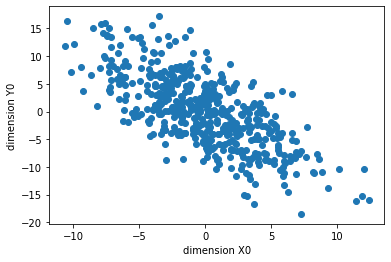

In [6]:
plt.scatter(X[:,0], Y[:,0])
plt.xlabel('dimension X0')
plt.ylabel('dimension Y0')
plt.plot()

## PLS and scikit-learn: basic use

In [0]:
train_idx = np.random.choice(range(X.shape[0]), size = int(X.shape[0]/2), replace = False)
test_idx = np.where(np.in1d(range(X.shape[0]), train_idx, assume_unique=True, invert = True))[0]

X_train = X[train_idx, :]
X_test = X[test_idx, :]

Y_train = Y[train_idx, :]
Y_test = Y[test_idx, :]


In [0]:
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

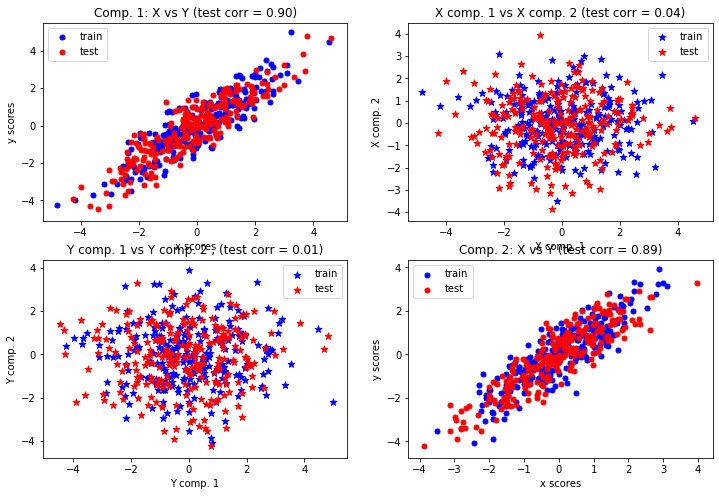

In [9]:
# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])

plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])

plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")



plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")

plt.show()


# Into the guts of latent variable models

## NIPALS for PLS

In [0]:
# Nipals method for PLS

n_components = 3

loading_x = np.ndarray([X.shape[1],n_components])
loading_y = np.ndarray([Y.shape[1],n_components])

scores_x = np.ndarray([X.shape[0],n_components])
scores_y = np.ndarray([Y.shape[0],n_components])

weight_x = np.ndarray([X.shape[1],n_components])
weight_y = np.ndarray([Y.shape[1],n_components])

current_X = X
current_Y = Y

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(100):
        w_y = current_Y.transpose().dot(t_x)/(t_x.transpose().dot(t_x))
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        w_x = current_X.transpose().dot(t_y)/(t_y.transpose().dot(t_y))
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)

    # Weights are such that X * weights = t
    weight_x[:,i] = w_x
    weight_y[:,i] = w_y
    
    # Latent dimensions
    scores_x[:,i] = t_x
    scores_x[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    # Deflation
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [11]:
weight_x

array([[ 0.07270742,  0.6497556 ,  0.3529152 ],
       [ 0.7887005 ,  0.42106521, -0.15723132],
       [ 0.36689862, -0.46934219,  0.50589324],
       [-0.00144821, -0.00086857,  0.75073631],
       [-0.48790209,  0.42454552,  0.17662445]])

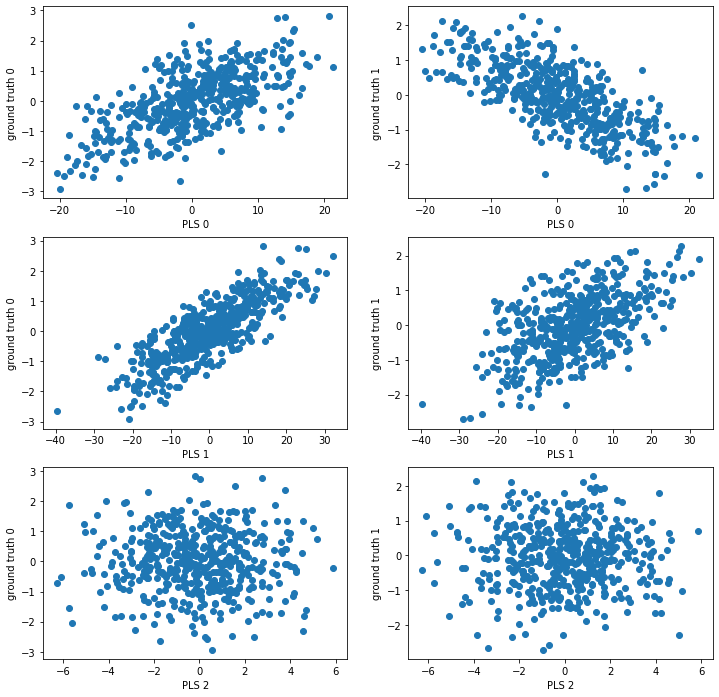

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
plt.scatter(scores_x[:,0], latents[:,0])
plt.xlabel('PLS 0')
plt.ylabel('ground truth 0')
plt.subplot(3,2,2)
plt.scatter(scores_x[:,0], latents[:,1])
plt.xlabel('PLS 0')
plt.ylabel('ground truth 1')
plt.subplot(3,2,3)
plt.scatter(scores_x[:,1], latents[:,0])
plt.xlabel('PLS 1')
plt.ylabel('ground truth 0')
plt.subplot(3,2,4)
plt.scatter(scores_x[:,1], latents[:,1])
plt.xlabel('PLS 1')
plt.ylabel('ground truth 1')
plt.subplot(3,2,5)
plt.scatter(scores_x[:,2], latents[:,0])
plt.xlabel('PLS 2')
plt.ylabel('ground truth 0')
plt.subplot(3,2,6)
plt.scatter(scores_x[:,2], latents[:,1])
plt.xlabel('PLS 2')
plt.ylabel('ground truth 1')
plt.show()

In [0]:
# Identifying rotation from X to t
# t * loadings_x.T * weight = X * weight 
# T =  X * weight * (loadings_x.T * weight)^-1 = X * rotations_x

rotations_x = weight_x.dot(np.linalg.pinv(loading_x.T.dot(weight_x)))

# Solving the regression from X to Y
# Y = X * rotations_x * loadings_y.T

regression_coef = np.dot(rotations_x, loading_y.T)

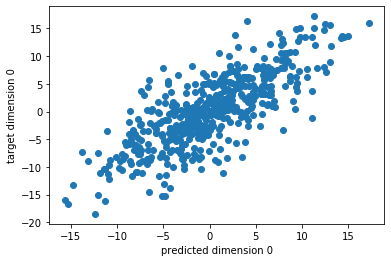

In [14]:
plt.scatter(X.dot(regression_coef)[:,0], Y[:,0])
plt.xlabel('predicted dimension 0')
plt.ylabel('target dimension 0')
plt.show()

In [0]:
# Comparing with SVD of covariance matrix

eig_val_x, eig_vect, eig_val_y = np.linalg.svd(X.transpose().dot(Y))

In [16]:
print(np.real(eig_val_x[:,:3]))
print(np.real(weight_x[:,:3]))

[[-0.07270742  0.6497556  -0.3529152 ]
 [-0.7887005   0.42106521  0.15723132]
 [-0.36689862 -0.46934219 -0.50589324]
 [ 0.00144821 -0.00086857 -0.75073631]
 [ 0.48790209  0.42454552 -0.17662445]]
[[ 0.07270742  0.6497556   0.3529152 ]
 [ 0.7887005   0.42106521 -0.15723132]
 [ 0.36689862 -0.46934219  0.50589324]
 [-0.00144821 -0.00086857  0.75073631]
 [-0.48790209  0.42454552  0.17662445]]


In [17]:
print(np.real(eig_val_y.T[:,:3]))
print(np.real(weight_y[:,:3]))

[[ 0.4487489  -0.41366302  0.33620487]
 [ 0.3410459   0.41864329  0.65368775]
 [ 0.20754655  0.55904246 -0.54300821]
 [ 0.13859384 -0.5839479  -0.29409379]
 [ 0.78741875  0.00985307 -0.27983843]]
[[-0.4487489  -0.41366302 -0.33620487]
 [-0.3410459   0.41864329 -0.65368775]
 [-0.20754655  0.55904246  0.54300821]
 [-0.13859384 -0.5839479   0.29409379]
 [-0.78741875  0.00985307  0.27983843]]


In [18]:
# PLS in scikit-learn 

plsca = PLSCanonical(n_components=3, scale = False)
plsca.fit(X, Y)

PLSCanonical(algorithm='nipals', copy=True, max_iter=500, n_components=3,
             scale=False, tol=1e-06)

In [19]:
print(plsca.x_weights_)
print(plsca.y_weights_)

[[ 7.54059867e-02  6.49821264e-01  3.14816839e-01]
 [ 7.90308546e-01  4.17694580e-01 -1.31682837e-01]
 [ 3.65033100e-01 -4.70711849e-01  5.18743406e-01]
 [-1.49958120e-03  3.61103765e-05  7.51812474e-01]
 [-4.86286876e-01  4.26255694e-01  2.21885717e-01]]
[[-0.45069799 -0.41114142 -0.37309546]
 [-0.33954902  0.42008359 -0.64367855]
 [-0.20541677  0.55973526  0.51454956]
 [-0.14074054 -0.58397915  0.2993499 ]
 [-0.78713013  0.01254199  0.30348987]]


## NIPALS for CCA

In [0]:
# Nipals method for CCA

loading_x_cca = np.ndarray([X.shape[1],n_components])
loading_y_cca = np.ndarray([Y.shape[1],n_components])

scores_x_cca = np.ndarray([X.shape[0],n_components])
scores_y_cca = np.ndarray([Y.shape[0],n_components])

weight_x_cca = np.ndarray([X.shape[1],n_components])
weight_y_cca = np.ndarray([Y.shape[1],n_components])

current_X = X
current_Y = Y

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(500):
        Y_pinv = np.linalg.pinv(Y)
        w_y = Y_pinv.dot(t_x)
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        X_pinv = np.linalg.pinv(X)
        w_x = X_pinv.dot(t_y)
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)

        
    # Weights are such that X * weights = t
    weight_x_cca[:,i] = w_x
    weight_y_cca[:,i] = w_y
    
    # Latent dimensions
    scores_x_cca[:,i] = t_x
    scores_x_cca[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x_cca[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y_cca[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [21]:
print(weight_x_cca)

[[ 0.19648278  0.67267688 -0.60431971]
 [-0.67189952  0.53280126 -0.51206743]
 [-0.43874459 -0.35078021  0.45181606]
 [ 0.10134033  0.01505764  0.09841363]
 [ 0.5542372   0.37464002 -0.39844904]]


## Reduced Rank Regression

In [0]:
# Reduced Rank Regression

n_components = 2
Gamma = np.eye(n_components)

SYX = np.dot(Y.T,X)

SXX = np.dot(X.T,X)

U, S, V = np.linalg.svd(np.dot(SYX, np.dot(np.linalg.pinv(SXX), SYX.T)))

A = V[0:n_components, :].T

B = np.dot(np.dot(A.T,SYX), np.linalg.pinv(SXX))

In [23]:
A

array([[-0.4857151 , -0.36997842],
       [ 0.35270426, -0.40810113],
       [ 0.51452388, -0.30228316],
       [-0.59899326, -0.03505162],
       [-0.12709365, -0.77715231]])

In [24]:
B

array([[ 1.20777673,  0.94394294, -0.6453868 ,  0.01987898,  0.68978866],
       [-0.10560424,  0.54915717,  0.32176979, -0.06989123, -0.40054982]])

In [0]:
regression_coef_rrr = np.dot(A,B)

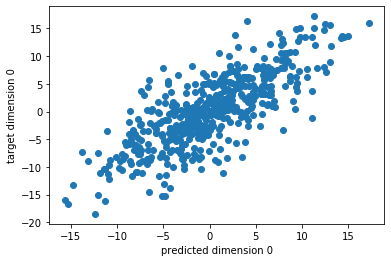

In [26]:
plt.scatter(np.dot(X,regression_coef)[:,0],Y[:,0])
plt.xlabel('predicted dimension 0')
plt.ylabel('target dimension 0')
plt.show()

## Sparsity in latent variable models

In [0]:
## Adding 3 random dimensions
## No association is expected from these features

X_sparse = np.hstack([X,np.random.randn(n*3).reshape([n,3])])
Y_sparse = np.hstack([Y,np.random.randn(n*3).reshape([n,3])])

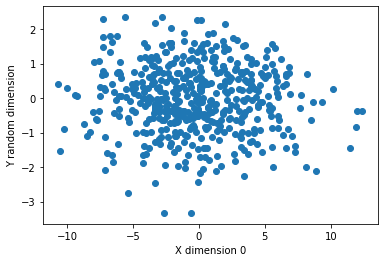

In [28]:
plt.scatter(X_sparse[:,0], Y_sparse[:,-1])
plt.xlabel('X dimension 0')
plt.ylabel('Y random dimension')
plt.show()

In [0]:
from sklearn import linear_model

n_components = 3

# Sparse PLS via regularization in NIPALS [Waaijenborg, et al 2007]

loading_x_sparse = np.ndarray([X_sparse.shape[1],n_components])
loading_y_sparse = np.ndarray([Y_sparse.shape[1],n_components])

scores_x_sparse = np.ndarray([X_sparse.shape[0],n_components])
scores_y_sparse = np.ndarray([Y_sparse.shape[0],n_components])

weight_x_sparse = np.ndarray([X_sparse.shape[1],n_components])
weight_y_sparse = np.ndarray([Y_sparse.shape[1],n_components])

current_X = X_sparse
current_Y = Y_sparse

## Penalty parameter for regularization
penalty = 10

eps = 1e-4

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(100):
        w_y = current_Y.transpose().dot(t_x)/(t_x.transpose().dot(t_x))
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        w_x = current_X.transpose().dot(t_y)/(t_y.transpose().dot(t_y))
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)
        
        ## Estimating sparse model for the weights of X
        lasso_x = linear_model.Lasso(alpha = penalty)
        lasso_x.fit(t_x.reshape(-1, 1), current_X)
        
        ## Estimating sparse model for the weights of Y
        lasso_y = linear_model.Lasso(alpha = penalty)
        lasso_y.fit(t_y.reshape(-1, 1), current_Y)
        
        w_x = (lasso_x.coef_ / (np.sqrt(np.sum(lasso_x.coef_**2) + eps))).reshape([X_sparse.shape[1]]) 
        w_y = (lasso_y.coef_ / (np.sqrt(np.sum(lasso_y.coef_**2) + eps))).reshape([Y_sparse.shape[1]])

    # Weights are such that X * weights = t
    weight_x_sparse[:,i] = w_x
    weight_y_sparse[:,i] = w_y
    
    # Latent dimensions
    scores_x_sparse[:,i] = t_x
    scores_x_sparse[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x_sparse[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y_sparse[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    # Deflation
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [30]:
weight_x_sparse

array([[ 0.        ,  0.80180995,  0.        ],
       [ 0.78756032,  0.29945968, -0.        ],
       [ 0.35775993, -0.42408858,  0.        ],
       [ 0.        , -0.        ,  0.        ],
       [-0.50160877,  0.29503759, -0.        ],
       [-0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ]])

In [31]:
weight_y_sparse

array([[-0.50104085, -0.39613636,  0.        ],
       [-0.14320289,  0.40823429, -0.        ],
       [-0.        ,  0.56752002,  0.        ],
       [-0.11513657, -0.59514775, -0.        ],
       [-0.84558475,  0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        ],
       [-0.        , -0.        ,  0.        ]])

In [32]:
weight_x

array([[ 0.07270742,  0.6497556 ,  0.3529152 ],
       [ 0.7887005 ,  0.42106521, -0.15723132],
       [ 0.36689862, -0.46934219,  0.50589324],
       [-0.00144821, -0.00086857,  0.75073631],
       [-0.48790209,  0.42454552,  0.17662445]])

In [33]:
weight_y

array([[-0.4487489 , -0.41366302, -0.33620487],
       [-0.3410459 ,  0.41864329, -0.65368775],
       [-0.20754655,  0.55904246,  0.54300821],
       [-0.13859384, -0.5839479 ,  0.29409379],
       [-0.78741875,  0.00985307,  0.27983843]])

In [34]:
plsca = PLSCanonical(n_components=3, scale = False)
plsca.fit(X_sparse, Y_sparse)
print(plsca.x_weights_)
print(plsca.y_weights_)

[[ 7.54547948e-02  6.49683582e-01  2.74294121e-01]
 [ 7.90310948e-01  4.17568305e-01 -1.07114182e-01]
 [ 3.64972996e-01 -4.70633468e-01  4.53241263e-01]
 [-1.50203768e-03  3.46189933e-05  6.58204591e-01]
 [-4.86215573e-01  4.26193326e-01  2.04127569e-01]
 [ 1.39551860e-03  1.77724249e-02 -4.67902687e-01]
 [ 6.71752697e-03  1.05334548e-03  3.84323156e-02]
 [ 7.41482118e-03 -9.71448027e-03 -1.12028253e-01]]
[[-4.50670523e-01 -4.11058437e-01 -3.71691517e-01]
 [-3.39508257e-01  4.20163632e-01 -6.89297822e-01]
 [-2.05372515e-01  5.59711754e-01  4.56893810e-01]
 [-1.40758463e-01 -5.83958037e-01  2.11222730e-01]
 [-7.87095096e-01  1.26016809e-02  3.52567408e-01]
 [-8.34098096e-03 -5.08002359e-03  6.16336969e-04]
 [ 7.13719746e-03  3.38758994e-03 -6.84638840e-02]
 [-4.54043375e-04 -3.62800623e-03 -6.59960067e-02]]


## Cross-validating components

In [0]:
n_cross_valid_run = 1000

n_components = 5

rep_results = [] 
for i in range(n_components):
  rep_results.append([])

for k in range(n_components):
  for i in range(n_cross_valid_run):
    batch1_idx = np.random.choice(range(X_sparse.shape[0]), size = int(X_sparse.shape[0]/2), replace = False)
    batch2_idx = np.where(np.in1d(range(X_sparse.shape[0]), batch1_idx, assume_unique=True, invert = True))[0]

    X_1 = X_sparse[batch1_idx, :]
    X_2 = X_sparse[batch2_idx, :]

    Y_1 = Y_sparse[batch1_idx, :]
    Y_2 = Y_sparse[batch2_idx, :]

    plsca1 = PLSCanonical(n_components = n_components, scale = False)
    plsca2 = PLSCanonical(n_components = n_components, scale = False)

    plsca1.fit(X_1,Y_1)
    plsca2.fit(X_2,Y_2)

    err1 = np.sum((plsca1.predict(X_2) - Y_2)**2)
    err2 = np.sum((plsca2.predict(X_1) - Y_1)**2)

    rep_results[k].append(np.mean([err1,err2]))


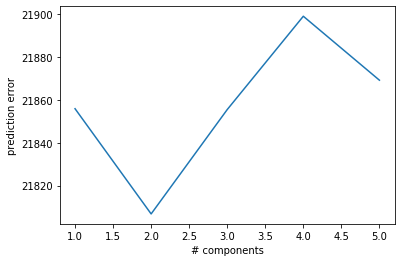

In [36]:
plt.plot(range(1,n_components+1),np.mean(rep_results, 1))
plt.xlabel('# components')
plt.ylabel('prediction error')
plt.show()

# Multi-channel Variational Autoencoder

https://gitlab.inria.fr/epione_ML/mcvae

In [37]:
from mcvae import pytorch_modules, utilities, preprocessing, plot, diagnostics
from pathlib import Path
import torch

DEVICE = pytorch_modules.DEVICE
print(f"Running on {DEVICE}")

Running on cpu


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
init_dict = {
    'n_channels': 2, # X and Y
    'lat_dim': n_components,
    'n_feats': tuple([X.shape[1], Y.shape[1]]),
}

data = []
data.append(torch.FloatTensor(X))
data.append(torch.FloatTensor(Y))

In [0]:
adam_lr = 1e-2
n_epochs = 4000

# Multi-Channel VAE
torch.manual_seed(24)
model = pytorch_modules.MultiChannelBase(**init_dict)

In [40]:
###################
## Model Fitting ##
###################

model.init_loss()
model.optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)
model.optimize(epochs = n_epochs, data = data)

====> Epoch:    0/4000 (0%)	Loss: 2395254.0000	LL: -17337.0664	KL: 2377917.0000	LL/KL: -0.0073
====> Epoch:  100/4000 (2%)	Loss: 765.4210	LL: -92.7115	KL: 672.7094	LL/KL: -0.1378
====> Epoch:  200/4000 (5%)	Loss: 610.8073	LL: -63.7959	KL: 547.0114	LL/KL: -0.1166
====> Epoch:  300/4000 (8%)	Loss: 539.8511	LL: -99.4435	KL: 440.4076	LL/KL: -0.2258
====> Epoch:  400/4000 (10%)	Loss: 420.3752	LL: -62.7712	KL: 357.6040	LL/KL: -0.1755
====> Epoch:  500/4000 (12%)	Loss: 355.6916	LL: -60.8894	KL: 294.8021	LL/KL: -0.2065
====> Epoch:  600/4000 (15%)	Loss: 307.3226	LL: -60.3466	KL: 246.9760	LL/KL: -0.2443
====> Epoch:  700/4000 (18%)	Loss: 274.2975	LL: -64.1764	KL: 210.1211	LL/KL: -0.3054
====> Epoch:  800/4000 (20%)	Loss: 238.9110	LL: -58.1384	KL: 180.7726	LL/KL: -0.3216
====> Epoch:  900/4000 (22%)	Loss: 214.7648	LL: -57.3532	KL: 157.4116	LL/KL: -0.3644
====> Epoch: 1000/4000 (25%)	Loss: 195.0486	LL: -56.5920	KL: 138.4566	LL/KL: -0.4087
====> Epoch: 1100/4000 (28%)	Loss: 184.4381	LL: -61.7463	K

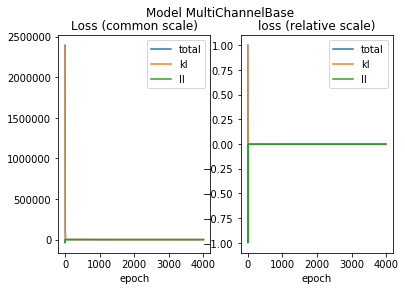

In [41]:
## Plotting model convergence

diagnostics.plot_loss(model)

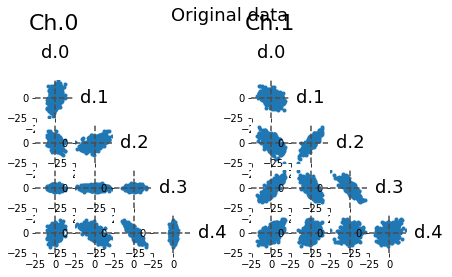

In [42]:
plot.lsplom(data, title = 'Original data')

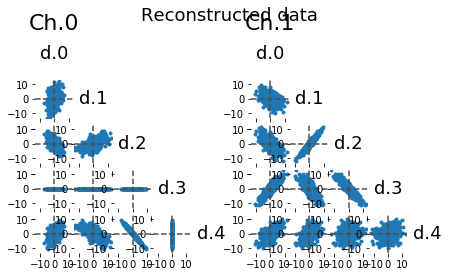

In [43]:
x_hat = model.reconstruct(data)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

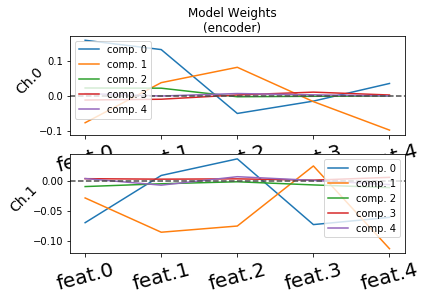

In [44]:
## Plotting the weights of the encoder

diagnostics.plot_weights(model, side = 'encoder')

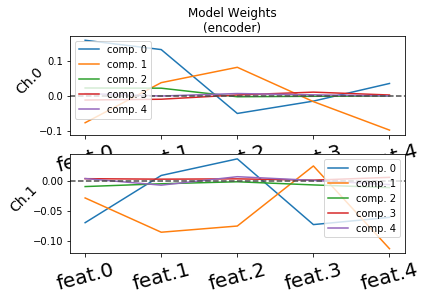

In [45]:
## Plotting the weights of the decoder

diagnostics.plot_weights(model, side = 'encoder')

In [0]:
weights_decoding_X = model.W_out[0]
weights_decoding_Y = model.W_out[1]

In [47]:
weights_decoding_X.weight

Parameter containing:
tensor([[ 1.5573e+00, -7.6598e-01,  1.8670e-01, -6.6057e-02,  1.5527e-02],
        [ 2.6830e+00,  2.4595e+00,  4.3031e-01, -2.3506e-01,  4.8858e-02],
        [-1.5918e-01,  2.2435e+00,  4.9845e-02, -1.4735e-02,  2.1479e-01],
        [-1.3804e-03,  9.8406e-03,  1.4536e-02,  2.5930e-03,  1.5537e-02],
        [-2.1643e-01, -2.6523e+00, -1.0767e-01,  8.2934e-02, -1.0459e-01]],
       requires_grad=True)

In [48]:
weights_decoding_Y.weight

Parameter containing:
tensor([[-2.8393e+00, -2.7079e-01, -3.8013e-01,  1.9314e-01,  1.2532e-01],
        [ 1.1204e+00, -2.1254e+00,  7.4781e-02, -1.0598e-02, -3.4279e-02],
        [ 2.0223e+00, -2.0538e+00,  1.8942e-01, -2.8129e-02,  2.5999e-01],
        [-2.8983e+00,  1.0913e+00, -3.2284e-01,  9.0860e-02, -2.3164e-03],
        [-1.7196e+00, -2.3801e+00, -3.0491e-01,  1.7613e-01, -2.4938e-03]],
       requires_grad=True)

In [0]:
weights_encoding_X = model.W_mu[0]
weights_encoding_Y = model.W_mu[1]

In [50]:
weights_encoding_X.weight

Parameter containing:
tensor([[ 0.1588,  0.1321, -0.0510, -0.0156,  0.0349],
        [-0.0777,  0.0373,  0.0813, -0.0171, -0.0987],
        [ 0.0220,  0.0214, -0.0031, -0.0018, -0.0009],
        [-0.0125, -0.0102,  0.0021,  0.0101,  0.0019],
        [ 0.0061, -0.0011,  0.0061,  0.0024, -0.0006]], requires_grad=True)

In [51]:
weights_encoding_Y.weight

Parameter containing:
tensor([[-0.0693,  0.0092,  0.0368, -0.0725, -0.0605],
        [-0.0282, -0.0852, -0.0749,  0.0250, -0.1127],
        [-0.0093, -0.0046, -0.0013, -0.0065, -0.0110],
        [ 0.0039,  0.0031,  0.0036,  0.0014,  0.0061],
        [ 0.0041, -0.0069,  0.0072,  0.0010, -0.0060]], requires_grad=True)

In [0]:
encoding = model.encode(data)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()

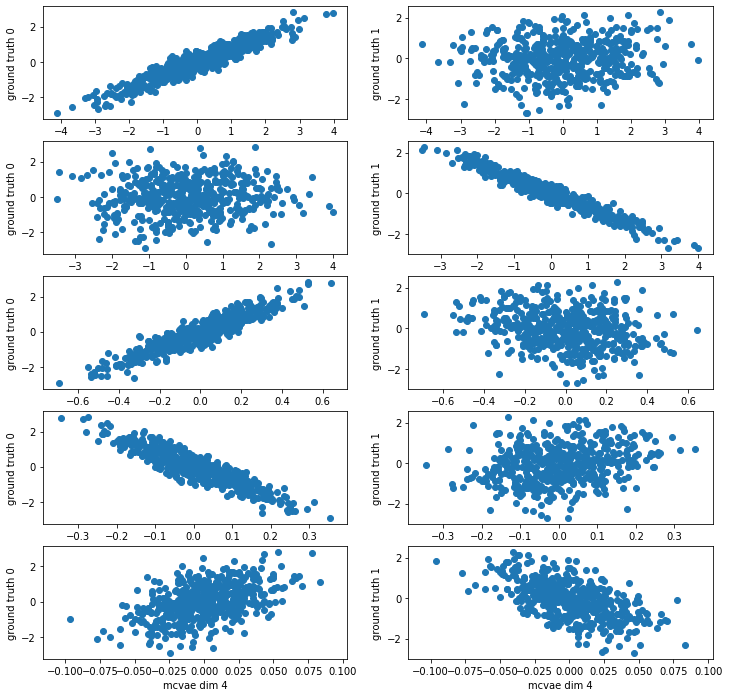

In [53]:
plt.figure(figsize=(12, 12))
for idx,k in enumerate(range(n_components)):
  plt.subplot(n_components,2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(n_components,2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')
plt.show()

In [54]:
adam_lr = 1e-2
n_epochs = 4000

model_sparse1 = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_sparse1.init_loss()
model_sparse1.optimizer = torch.optim.Adam(model_sparse1.parameters(), lr=adam_lr)
model_sparse1.optimize(epochs = n_epochs, data = data)


====> Epoch:    0/4000 (0%)	Loss: 71.7239	LL: -67.4302	KL: 4.2937	LL/KL: -15.7046
====> Epoch:  100/4000 (2%)	Loss: 58.4578	LL: -54.4942	KL: 3.9636	LL/KL: -13.7487
====> Epoch:  200/4000 (5%)	Loss: 56.6359	LL: -51.3985	KL: 5.2374	LL/KL: -9.8138
====> Epoch:  300/4000 (8%)	Loss: 55.8991	LL: -49.8384	KL: 6.0607	LL/KL: -8.2232
====> Epoch:  400/4000 (10%)	Loss: 56.1437	LL: -49.6586	KL: 6.4851	LL/KL: -7.6573
====> Epoch:  500/4000 (12%)	Loss: 56.0976	LL: -49.4307	KL: 6.6669	LL/KL: -7.4144
====> Epoch:  600/4000 (15%)	Loss: 55.3362	LL: -47.8249	KL: 7.5113	LL/KL: -6.3670
====> Epoch:  700/4000 (18%)	Loss: 54.4962	LL: -45.9936	KL: 8.5027	LL/KL: -5.4093
====> Epoch:  800/4000 (20%)	Loss: 54.4459	LL: -45.8398	KL: 8.6060	LL/KL: -5.3265
====> Epoch:  900/4000 (22%)	Loss: 54.6260	LL: -46.0328	KL: 8.5932	LL/KL: -5.3569
====> Epoch: 1000/4000 (25%)	Loss: 54.5266	LL: -45.9810	KL: 8.5456	LL/KL: -5.3806
====> Epoch: 1100/4000 (28%)	Loss: 54.5746	LL: -46.0542	KL: 8.5203	LL/KL: -5.4052
====> Epoch: 1200/

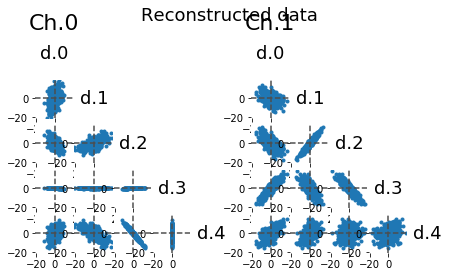

In [55]:
x_hat = model_sparse1.reconstruct(data)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

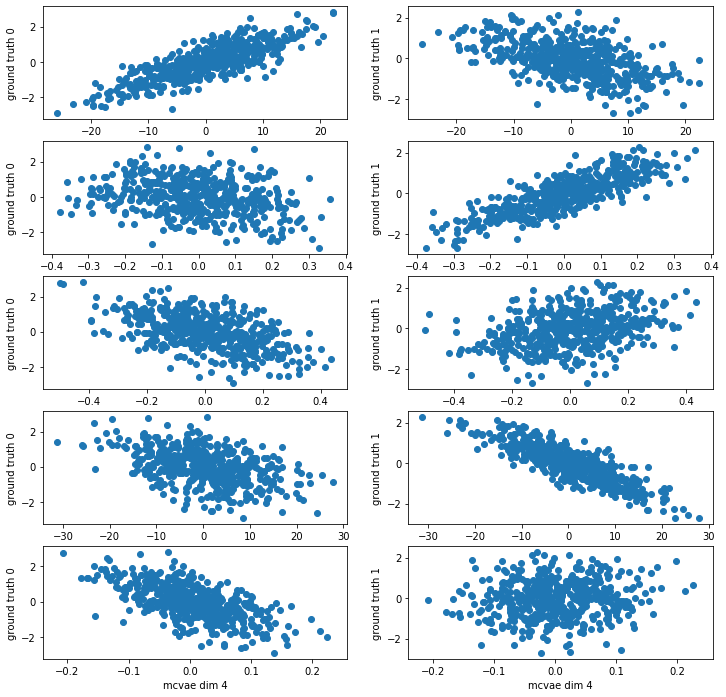

In [56]:
encoding = model_sparse1.encode(data)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()


plt.figure(figsize=(12, 12))
for idx,k in enumerate(range(n_components)):
  plt.subplot(n_components,2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(n_components,2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')
plt.show()


In [57]:
print('Probability of redundancy: ', model_sparse1.dropout.detach().numpy())

Probability of redundancy:  [[0.04863026 0.9969437  0.9965886  0.04864047 0.9971646 ]]


In [0]:
model_sparse1.dropout_threshold = 0.2

Dropout threshold: 0.2
Components kept: [0, 3]


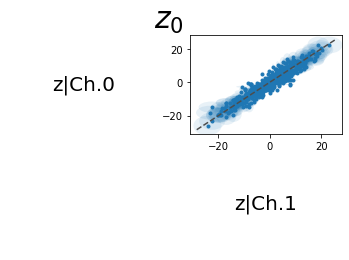

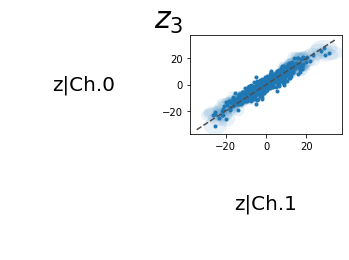

In [59]:
diagnostics.plot_latent_space(model_sparse1, data)

In [60]:
init_dict = {
    'n_channels': 2, # X and Y
    'lat_dim': n_components + 3,
    'n_feats': tuple([X_sparse.shape[1], Y_sparse.shape[1]]),
}


data_sparse = []
data_sparse.append(torch.FloatTensor(X_sparse))
data_sparse.append(torch.FloatTensor(Y_sparse))

adam_lr = 1e-2
n_epochs = 4000

model_sparse = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_sparse.init_loss()
model_sparse.optimizer = torch.optim.Adam(model_sparse.parameters(), lr=adam_lr)
model_sparse.optimize(epochs = n_epochs, data = data_sparse)

====> Epoch:    0/4000 (0%)	Loss: 107.7109	LL: -100.7855	KL: 6.9255	LL/KL: -14.5529
====> Epoch:  100/4000 (2%)	Loss: 81.6295	LL: -77.2056	KL: 4.4239	LL/KL: -17.4518
====> Epoch:  200/4000 (5%)	Loss: 77.4762	LL: -72.8470	KL: 4.6292	LL/KL: -15.7363
====> Epoch:  300/4000 (8%)	Loss: 75.2929	LL: -70.4163	KL: 4.8765	LL/KL: -14.4398
====> Epoch:  400/4000 (10%)	Loss: 74.8558	LL: -69.6014	KL: 5.2544	LL/KL: -13.2462
====> Epoch:  500/4000 (12%)	Loss: 73.7720	LL: -67.7453	KL: 6.0268	LL/KL: -11.2407
====> Epoch:  600/4000 (15%)	Loss: 73.3610	LL: -66.9789	KL: 6.3821	LL/KL: -10.4948
====> Epoch:  700/4000 (18%)	Loss: 73.6614	LL: -67.1864	KL: 6.4750	LL/KL: -10.3763
====> Epoch:  800/4000 (20%)	Loss: 73.4372	LL: -66.7268	KL: 6.7105	LL/KL: -9.9437
====> Epoch:  900/4000 (22%)	Loss: 72.5866	LL: -64.6935	KL: 7.8931	LL/KL: -8.1962
====> Epoch: 1000/4000 (25%)	Loss: 72.1371	LL: -63.3182	KL: 8.8189	LL/KL: -7.1798
====> Epoch: 1100/4000 (28%)	Loss: 71.8151	LL: -63.0572	KL: 8.7580	LL/KL: -7.2000
====> Epoc

In [61]:
print('Probability of redundancy: ', model_sparse.dropout.detach().numpy())
indices = np.where(model_sparse.dropout.detach().numpy().flatten() < 0.9)[0]
print('Non-redundant components: ', indices)

Probability of redundancy:  [[0.9949268  0.9952199  0.9953541  0.99519444 0.04624334 0.9951109
  0.9949958  0.04735698]]
Non-redundant components:  [4 7]


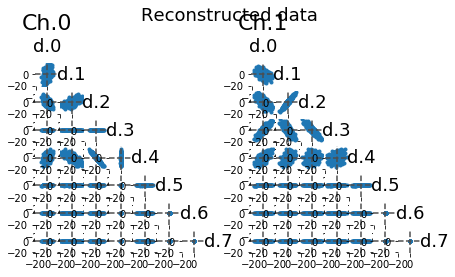

In [62]:
model_sparse.dropout_threshold = 0.2

x_hat = model_sparse.reconstruct(data_sparse)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

Dropout threshold: 0.2
Components kept: [4, 7]


<Figure size 864x576 with 0 Axes>

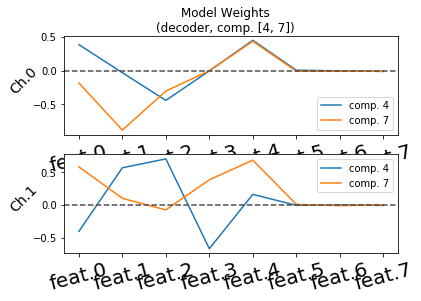

In [63]:
## Plotting the weights of the decoder

plt.figure(figsize=(12, 8))
diagnostics.plot_weights(model_sparse, side = 'decoder')

Dropout threshold: 0.2
Components kept: [4, 7]


<Figure size 864x576 with 0 Axes>

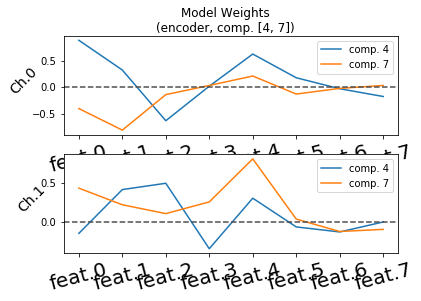

In [64]:
plt.figure(figsize=(12, 8))
diagnostics.plot_weights(model_sparse, side = 'encoder')

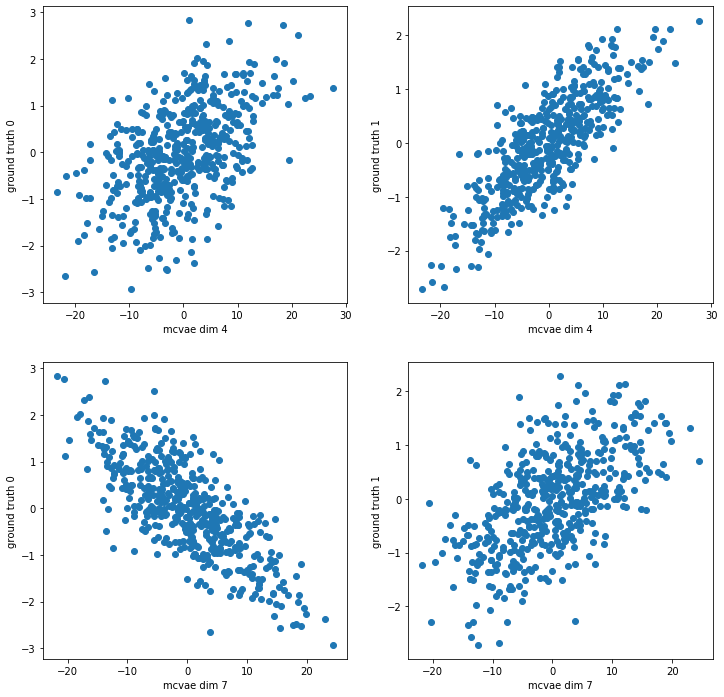

In [65]:
encoding = model_sparse.encode(data_sparse)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()

plt.figure(figsize=(12, 12))
for idx,k in enumerate(indices):
  plt.subplot(len(indices),2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(len(indices),2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')

plt.show()

Dropout threshold: 0.2
Components kept: [0, 3]


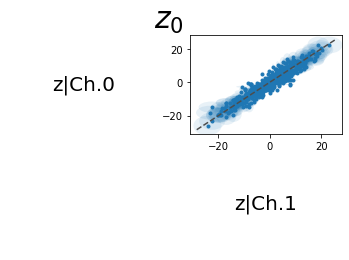

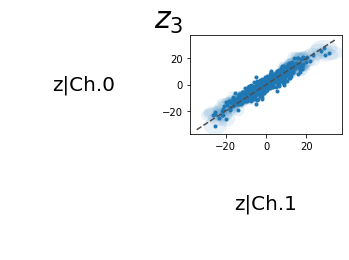

In [66]:
diagnostics.plot_latent_space(model_sparse1, data)

# Increasing the number of channels

In [0]:
# generating a new channel

size_z = 3
size_z_redundant = 4

transform_z = np.random.randint(-8,8, size = 2*size_z).reshape([2,size_z])

Z = latents.dot(transform_z) + 2*np.random.normal(size = n*size_z).reshape((n, size_z))
Z = np.hstack([Z,np.random.randn(n*size_z_redundant).reshape([n,size_z_redundant])])

In [68]:
init_dict = {
    'n_channels': 3, # X and Y
    'lat_dim': n_components + 3,
    'n_feats': tuple([X_sparse.shape[1], Y_sparse.shape[1], Z.shape[1]]),
}


data_multi = []
data_multi.append(torch.FloatTensor(X_sparse))
data_multi.append(torch.FloatTensor(Y_sparse))
data_multi.append(torch.FloatTensor(Z))

adam_lr = 1e-2
n_epochs = 4000

model_multi = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_multi.init_loss()
model_multi.optimizer = torch.optim.Adam(model_multi.parameters(), lr=adam_lr)
model_multi.optimize(epochs = n_epochs, data = data_multi)

====> Epoch:    0/4000 (0%)	Loss: 215.0953	LL: -204.7717	KL: 10.3236	LL/KL: -19.8353
====> Epoch:  100/4000 (2%)	Loss: 172.0860	LL: -165.1971	KL: 6.8889	LL/KL: -23.9802
====> Epoch:  200/4000 (5%)	Loss: 161.5134	LL: -153.9649	KL: 7.5485	LL/KL: -20.3967
====> Epoch:  300/4000 (8%)	Loss: 156.8356	LL: -148.9134	KL: 7.9222	LL/KL: -18.7969
====> Epoch:  400/4000 (10%)	Loss: 152.2845	LL: -143.2115	KL: 9.0730	LL/KL: -15.7844
====> Epoch:  500/4000 (12%)	Loss: 151.1843	LL: -141.6980	KL: 9.4863	LL/KL: -14.9370
====> Epoch:  600/4000 (15%)	Loss: 150.7577	LL: -141.3237	KL: 9.4340	LL/KL: -14.9803
====> Epoch:  700/4000 (18%)	Loss: 151.1193	LL: -141.6126	KL: 9.5067	LL/KL: -14.8961
====> Epoch:  800/4000 (20%)	Loss: 150.4899	LL: -140.8774	KL: 9.6125	LL/KL: -14.6556
====> Epoch:  900/4000 (22%)	Loss: 150.8178	LL: -140.9170	KL: 9.9008	LL/KL: -14.2329
====> Epoch: 1000/4000 (25%)	Loss: 150.7804	LL: -140.4377	KL: 10.3427	LL/KL: -13.5784
====> Epoch: 1100/4000 (28%)	Loss: 150.6065	LL: -140.0618	KL: 10.54

Probability of redundancy:  [[0.18658197 0.99561167 0.9954455  0.03283248 0.9961589  0.9960371
  0.9960102  0.99596006]]
Non-redundant components:  [0 3]


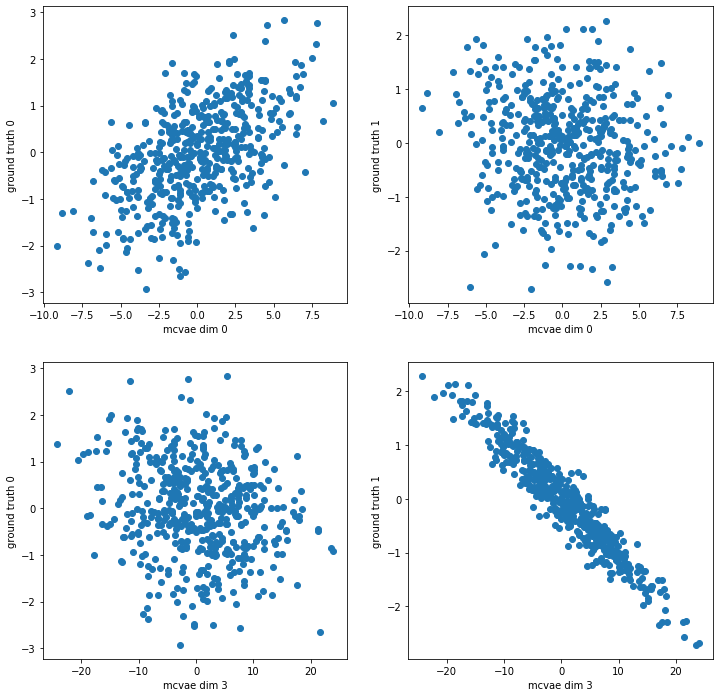

In [69]:
print('Probability of redundancy: ', model_multi.dropout.detach().numpy())
indices = np.where(model_multi.dropout.detach().numpy().flatten() < 0.9)[0]
print('Non-redundant components: ', indices)

model_multi.dropout_threshold = 0.2

encoding = model_multi.encode(data_multi)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()
encoding_z = encoding[2].loc.detach().numpy()

plt.figure(figsize=(12, 12))
for idx,k in enumerate(indices):
    plt.subplot(len(indices),2,2*idx+1)
    plt.scatter(encoding_z[:,k], latents[:,0])
    plt.xlabel(str('mcvae dim ') + str(k))
    plt.ylabel('ground truth 0')
    plt.subplot(len(indices),2,2*idx+2)
    plt.scatter(encoding_z[:,k], latents[:,1])
    plt.xlabel(str('mcvae dim ') + str(k))
    plt.ylabel('ground truth 1')

plt.show()

In [0]:
reconstruction = model_multi.decode(model_multi.sample_from(encoding))

decoding_x_from_x = reconstruction[0][0].loc.detach().numpy()
decoding_x_from_y = reconstruction[1][0].loc.detach().numpy()
decoding_x_from_z = reconstruction[2][0].loc.detach().numpy()

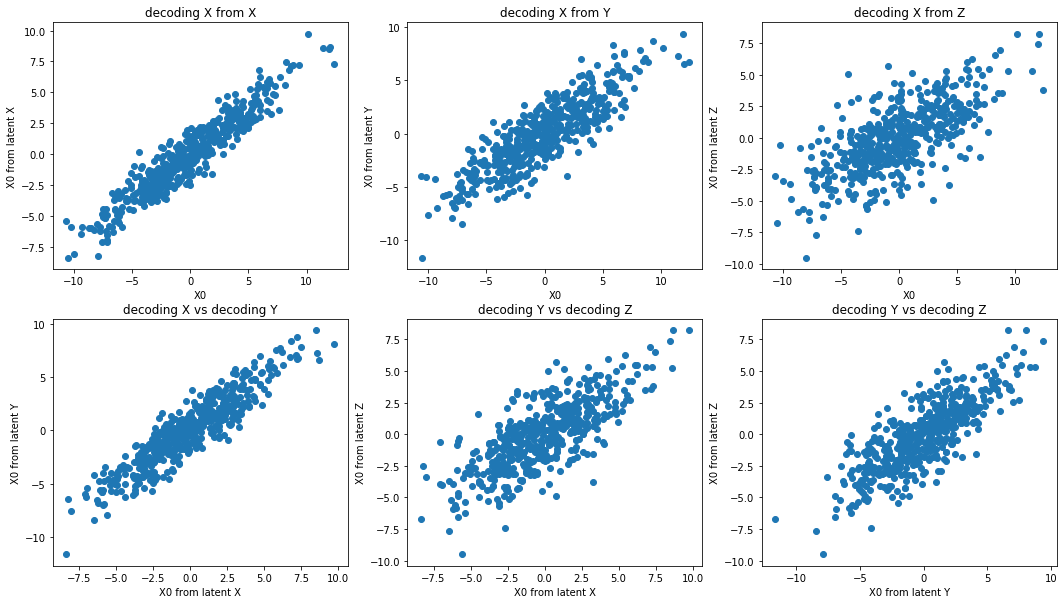

In [71]:
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plt.scatter(X_sparse[:,0], decoding_x_from_x[:,0])
plt.title('decoding X from X')
plt.xlabel('X0')
plt.ylabel('X0 from latent X')
plt.subplot(2,3,2)
plt.scatter(X_sparse[:,0], decoding_x_from_y[:,0])
plt.title('decoding X from Y')
plt.ylabel('X0 from latent Y')
plt.xlabel('X0')
plt.subplot(2,3,3)
plt.scatter(X_sparse[:,0], decoding_x_from_z[:,0])
plt.title('decoding X from Z')
plt.xlabel('X0')
plt.ylabel('X0 from latent Z')
plt.subplot(2,3,4)
plt.scatter(decoding_x_from_x[:,0], decoding_x_from_y[:,0])
plt.title('decoding X vs decoding Y')
plt.xlabel('X0 from latent X')
plt.ylabel('X0 from latent Y')
plt.subplot(2,3,5)
plt.scatter(decoding_x_from_x[:,0], decoding_x_from_z[:,0])
plt.title('decoding Y vs decoding Z')
plt.xlabel('X0 from latent X')
plt.ylabel('X0 from latent Z')
plt.subplot(2,3,6)
plt.scatter(decoding_x_from_y[:,0], decoding_x_from_z[:,0])
plt.title('decoding Y vs decoding Z')
plt.xlabel('X0 from latent Y')
plt.ylabel('X0 from latent Z')
plt.show()

Dropout threshold: 0.2
Components kept: [0, 3]


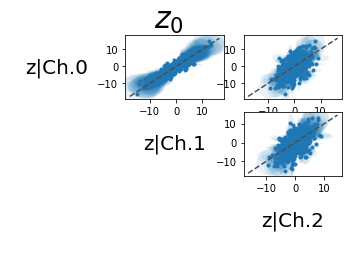

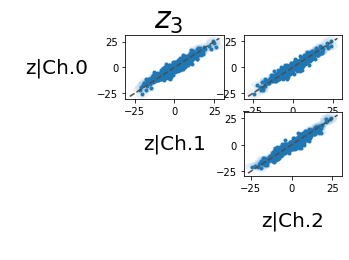

In [72]:
diagnostics.plot_latent_space(model_multi, data_multi)

# Example on ADNI data

In [0]:
import pandas as pd
import torch
from mcvae import pytorch_modules, utilities, preprocessing, plot, diagnostics


In [0]:
volumes = pd.read_csv('https://marcolorenzi.github.io/material/winter_school/volumes.csv')
volumes_value = np.array(volumes.iloc[:,2:]).reshape([len(volumes.RID),5])

for i in range(volumes_value.shape[1]):
    volumes_value[:,i] = (volumes_value[:,i] - np.mean(volumes_value[:,i]))/np.std(volumes_value[:,i])

In [0]:
demog = pd.read_csv('https://marcolorenzi.github.io/material/winter_school/demog.csv')
demog_value = np.array(demog.iloc[:,2:]).reshape([len(demog.RID),3])

for i in range(demog_value.shape[1]):
    demog_value[:,i] = (demog_value[:,i] - np.mean(demog_value[:,i]))/np.std(demog_value[:,i])


In [0]:
cognition = pd.read_csv('https://marcolorenzi.github.io/material/winter_school/cognition.csv')
cognition_value = np.array(cognition.iloc[:,2:]).reshape([len(cognition.RID),7])

for i in range(cognition_value.shape[1]):
    cognition_value[:,i] = (cognition_value[:,i] - np.mean(cognition_value[:,i]))/np.std(cognition_value[:,i])

In [0]:
apoe = pd.read_csv('https://marcolorenzi.github.io/material/winter_school/apoe.csv')
apoe_value = np.array(apoe.iloc[:,2:]).reshape([len(apoe.RID),1])

for i in range(apoe_value.shape[1]):
    apoe_value[:,i] = (apoe_value[:,i] - np.mean(apoe_value[:,i]))/np.std(apoe_value[:,i])

In [0]:
fluid = pd.read_csv('https://marcolorenzi.github.io/material/winter_school/fluid.csv')
fluid_value = np.array(fluid.iloc[:,2:]).reshape(len(apoe.RID),3)

for i in range(fluid_value.shape[1]):
    fluid_value[:,i] = (fluid_value[:,i] - np.mean(fluid_value[:,i]))/np.std(fluid_value[:,i])

In [0]:
init_dict = {
    'n_channels': 5, 
    'lat_dim': 5,
    'n_feats': tuple([volumes_value.shape[1], demog_value.shape[1], cognition_value.shape[1], apoe_value.shape[1], fluid_value.shape[1]]),
}

In [0]:
data_adni = []
data_adni.append(torch.FloatTensor(volumes_value))
data_adni.append(torch.FloatTensor(np.array(demog_value)))
data_adni.append(torch.FloatTensor(cognition_value))
data_adni.append(torch.FloatTensor(apoe_value))
data_adni.append(torch.FloatTensor(fluid_value))

In [86]:
adam_lr = 1e-2
n_epochs = 6000

model_adni = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_adni.init_loss()
model_adni.optimizer = torch.optim.Adam(model_adni.parameters(), lr=adam_lr)
model_adni.optimize(epochs = n_epochs, data = data_adni)

====> Epoch:    0/6000 (0%)	Loss: 243.2113	LL: -232.4349	KL: 10.7765	LL/KL: -21.5688
====> Epoch:  100/6000 (2%)	Loss: 193.2305	LL: -188.2483	KL: 4.9822	LL/KL: -37.7843
====> Epoch:  200/6000 (3%)	Loss: 156.1643	LL: -153.2857	KL: 2.8787	LL/KL: -53.2490
====> Epoch:  300/6000 (5%)	Loss: 136.6568	LL: -134.5768	KL: 2.0800	LL/KL: -64.7010
====> Epoch:  400/6000 (7%)	Loss: 131.4245	LL: -129.5577	KL: 1.8667	LL/KL: -69.4036
====> Epoch:  500/6000 (8%)	Loss: 130.8185	LL: -128.9248	KL: 1.8937	LL/KL: -68.0813
====> Epoch:  600/6000 (10%)	Loss: 130.8938	LL: -128.9277	KL: 1.9661	LL/KL: -65.5757
====> Epoch:  700/6000 (12%)	Loss: 130.9134	LL: -128.8846	KL: 2.0288	LL/KL: -63.5287
====> Epoch:  800/6000 (13%)	Loss: 130.9895	LL: -128.9262	KL: 2.0632	LL/KL: -62.4872
====> Epoch:  900/6000 (15%)	Loss: 131.0689	LL: -128.9826	KL: 2.0863	LL/KL: -61.8241
====> Epoch: 1000/6000 (17%)	Loss: 131.1614	LL: -129.0660	KL: 2.0954	LL/KL: -61.5956
====> Epoch: 1100/6000 (18%)	Loss: 131.0201	LL: -128.9248	KL: 2.0953	L

In [87]:
print('Significant dimensions: ', model_adni.dropout.detach().numpy())
significant_dim = np.where(model_adni.dropout.detach().numpy()<0.5)[1]


Significant dimensions:  [[0.9975543  0.4524557  0.99745613 0.99763536 0.9974531 ]]


In [88]:
decoding_weights = []

for i in range(init_dict['n_channels']):
    decoding_weights.append(model_adni.W_out[i].weight.detach().numpy()[:,significant_dim[0]])

decoding_weights[0]

array([ 0.25105935, -0.18871282,  0.30579606,  0.2663263 ,  0.28677785],
      dtype=float32)

<BarContainer object of 3 artists>

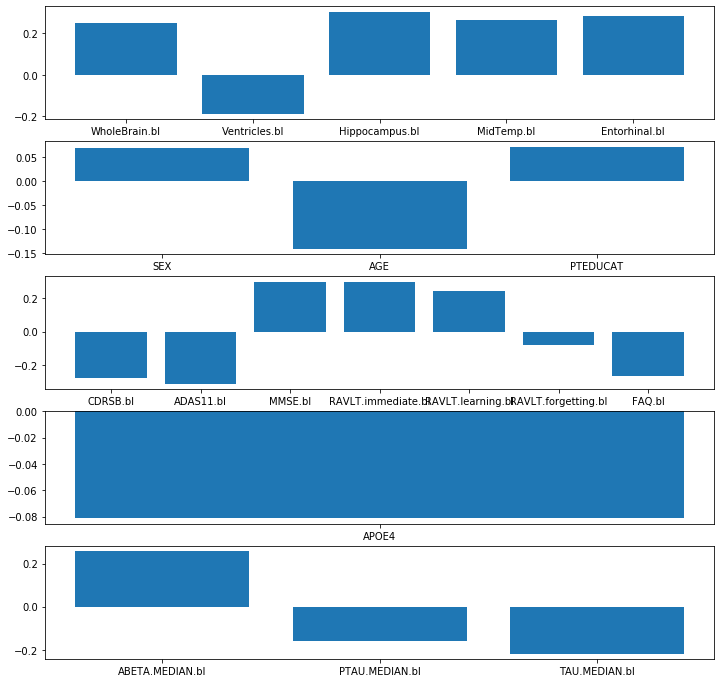

In [89]:
plt.figure(figsize=(12, 12))
plt.subplot(5,1,1)
plt.bar(np.arange(len(decoding_weights[0])), decoding_weights[0], tick_label = volumes.columns[2:])
plt.subplot(5,1,2)
plt.bar(np.arange(len(decoding_weights[1])), decoding_weights[1], tick_label = demog.columns[2:])
plt.subplot(5,1,3)
plt.bar(np.arange(len(decoding_weights[2])), decoding_weights[2], tick_label = cognition.columns[2:])
plt.subplot(5,1,4)
plt.bar(np.arange(len(decoding_weights[3])), decoding_weights[3], tick_label = apoe.columns[2:])
plt.subplot(5,1,5)
plt.bar(np.arange(len(decoding_weights[4])), decoding_weights[4], tick_label = fluid.columns[2:])


In [0]:
encoding_cognition = model_adni.W_out[2].weight.detach().numpy()

projection_cognition = cognition_value.dot(encoding_cognition)

decoding_volumes = model_adni.W_out[0].weight.detach().numpy()

reconstruction_volume_from_cognition = projection_cognition.dot(decoding_volumes.T)


In [0]:
# Alternative compact way
predictions = model_adni.decode(model_adni.sample_from(model_adni.encode(data_adni)))

decoding_volume_from_cognition = predictions[2][0].loc.detach().numpy()

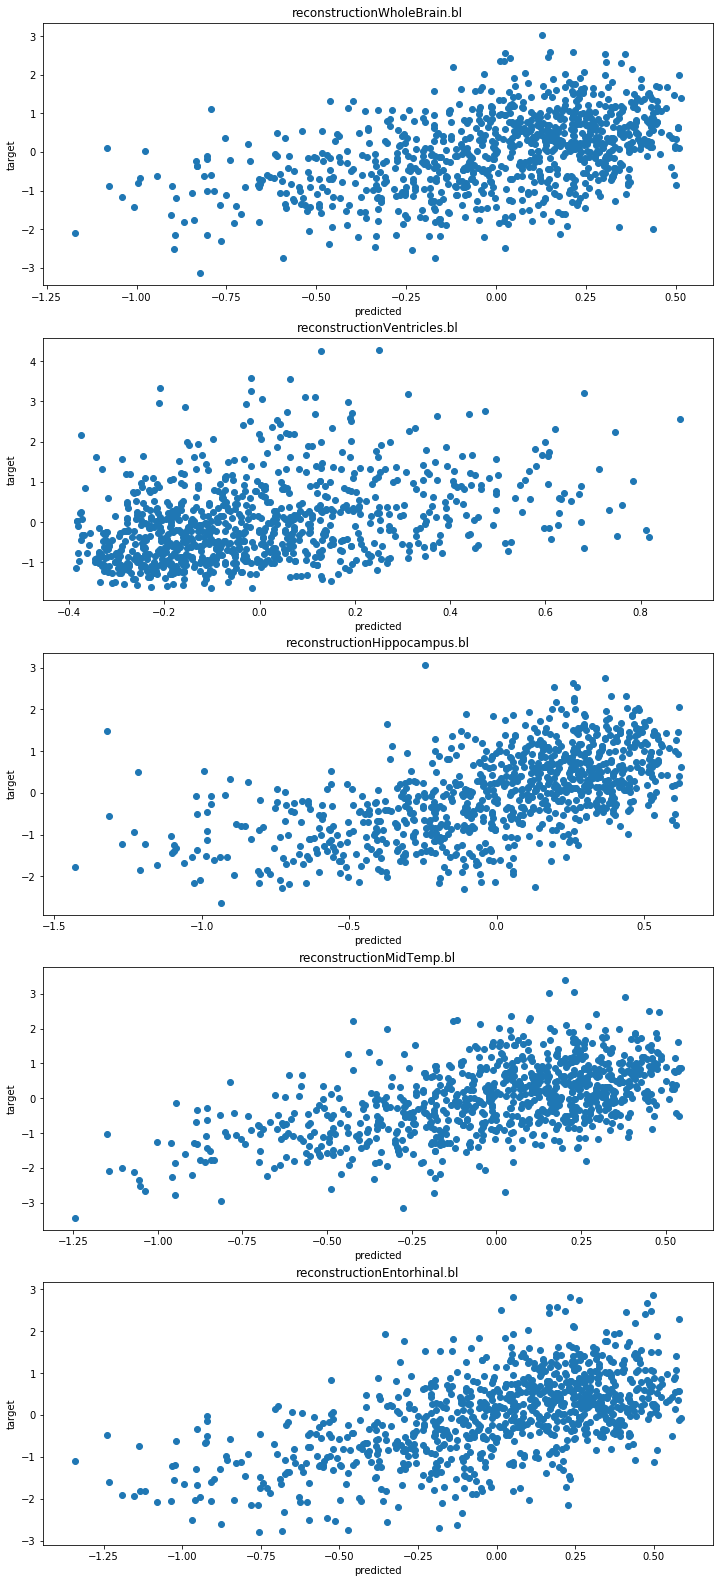

In [92]:
plt.figure(figsize=(12, 28))

for i in range(5):
    plt.subplot(5,1,i+1)
    plt.scatter(decoding_volume_from_cognition[:,i], volumes_value[:,i])
    plt.title('reconstruction' + volumes.columns[2+i])
    plt.xlabel('predicted')
    plt.ylabel('target')
plt.show()

In [93]:
plsca = PLSCanonical(n_components=3, scale = False)
plsca.fit(cognition_value,volumes_value)
print(plsca.x_weights_)
print(plsca.y_weights_)

[[ 0.39899923  0.10784175  0.46702126]
 [ 0.46449063 -0.17600757  0.30801738]
 [-0.41970768  0.02252307  0.05284719]
 [-0.41480449  0.25193258  0.5752117 ]
 [-0.33759258 -0.35942915  0.527915  ]
 [ 0.09007329  0.86611085  0.09016765]
 [ 0.39338126 -0.11864597  0.25793539]]
[[-0.39539685  0.40966994  0.55358155]
 [ 0.30948675 -0.25355692  0.03687062]
 [-0.50592711 -0.48090226  0.50498596]
 [-0.48167611  0.53524535 -0.4254469 ]
 [-0.50980895 -0.50012484 -0.50613451]]


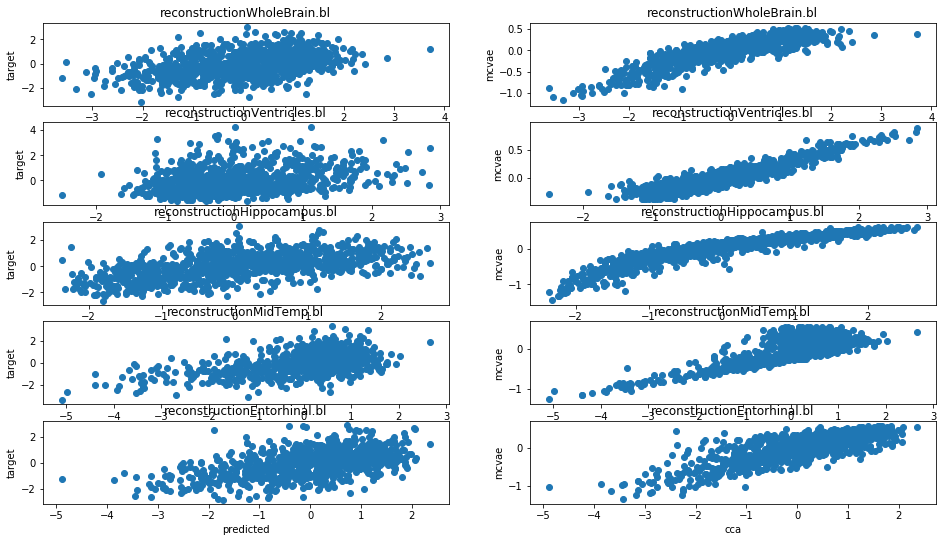

In [94]:
predicted_plsca = plsca.predict(cognition_value)

plt.figure(figsize=(16, 18))

for i in range(5):
    plt.subplot(10,2,2*i+1)
    plt.scatter(predicted_plsca[:,i], volumes_value[:,i])
    plt.title('reconstruction' + volumes.columns[2+i])
    plt.xlabel('predicted')
    plt.ylabel('target')
       
for i in range(5):
    plt.subplot(10,2,2*i+2)
    plt.scatter(predicted_plsca[:,i], decoding_volume_from_cognition[:,i])
    plt.title('reconstruction' + volumes.columns[2+i])
    plt.xlabel('cca')
    plt.ylabel('mcvae')
    
plt.show()

In [95]:
print('Reconstruction error:')
print('CCA: ' + str(np.sum((predicted_plsca-volumes_value)**2)))
print('mvae: ' + str(np.sum((decoding_volume_from_cognition-volumes_value)**2)))

Reconstruction error:
CCA: 5209.240692014497
mvae: 3524.6333917563456
